In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To scale the data using z-score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

In [15]:
data = pd.read_csv(r"C:\Users\sanje_crlv28m\Downloads\train_u6lujuX_CVtuZ9i (1).csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
Observations:
There are 614 observations and 13 columns in the data.
ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, and Loan_Status are numeric data types. The rest of the variables are of the object data type.
There are several columns with less than 614 non-null entries i.e. these columns have missing values.
Loan_ID column is an identifier. Let's check if each entry of the column is unique.

In [17]:
data.Loan_ID.nunique()

614

In [ ]:
Observations:
We can see that all the entries of this column are unique. Hence, this column would not add any value to our analysis.
Let's drop this column.

In [ ]:
Exploratory Data Analysis and Data Preprocessing:

In [ ]:
Dropping Loan_ID column:

In [18]:
data.drop(columns=['Loan_ID'], inplace = True)

In [ ]:
Summary Statistics for numerical columns:

In [19]:
#Creating a list of numerical columns
num_cols = num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [20]:
#printing summary statistics

data[num_cols].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


In [ ]:
Observations:
The mean applicant income is around $5403.46
The minimum value for applicant income is $150 which is very small and could be an outlier since it is very far from both the mean and the median.
There are a good number of co applicants with no income, as can be observed by thet fact that the 25% quantile of coapplicants have an income of 0.

In [ ]:
Feature Engineering:

In [21]:
#Converting the scale of loan term from months to years
data['Loan_Amount_Term']=data['Loan_Amount_Term']/12

In [22]:
#Adding the applicant and co-applicant income to get the total income per application
data['total_income']=data['ApplicantIncome'] + data['CoapplicantIncome']

In [23]:
#Dropping the columns as we created a new column which captures the same information
data.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)

In [ ]:
Checking the distribution and outliers for each column in the data:

LoanAmount
Skew : 2.68


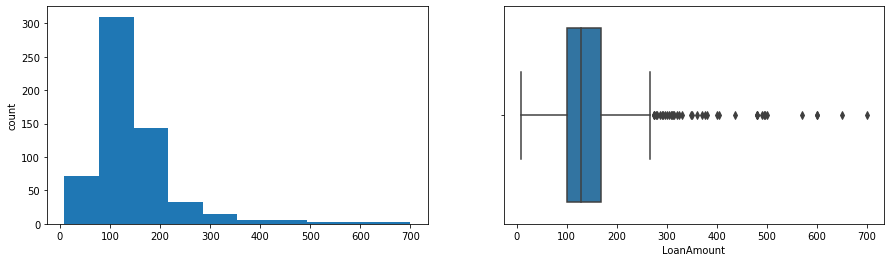

total_income
Skew : 5.63


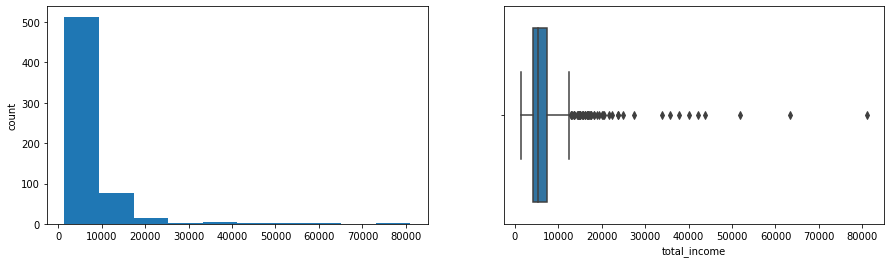

In [24]:
for col in ['LoanAmount', 'total_income']:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

In [ ]:
Observations:
Both the variables are highly skewed to the right and have many outliers which can be expected as the data contains different types of areas - Rural, Urban & Semi-Urban.
We can observe from the histogram that majority of values for total income are less than 10,000K dollars.
Now, let's check the percentage of observations in each category for all the categorical variables.

In [ ]:
Checking percentage of each category for categorical variables:

In [25]:
#Creating list of categorical columns
cat_col= ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History','Property_Area', 'Loan_Status']

In [26]:
for col in cat_col:
    print(data[col].value_counts(normalize=True)) 
    print('*'*40) 

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64
****************************************
Yes    0.651391
No     0.348609
Name: Married, dtype: float64
****************************************
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64
****************************************
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64
****************************************
No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64
****************************************
1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64
****************************************
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64
****************************************
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64
****************************************


In [ ]:
Observations:

The vast majority of applicants are male (81%).

65% of applicants are married, and 57% of them have no dependents

78% of the applicants are graduates

85% of the applicants are self employed

84% of the applicants have credit histories that meet the required guidelines

The property area among the applicants is roughly evenly split across semiurban, urban, and rural, with semi-urban having a slightly higher portion (37.9%)

In [ ]:
Imputing missing values:

In [27]:
#Imputing missing values with mode for the categorical variables 
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']:
    data[col].fillna(value=data[col].mode()[0], inplace=True)

In [28]:
#Replacing 0's with null values in loan amount 
data.LoanAmount.replace(0, np.nan, inplace=True)

In [29]:
#Imputing null values in loan amount with the median
data.LoanAmount.fillna(value=data.LoanAmount.median(), inplace=True)

In [ ]:
Checking for null values:

In [30]:
data.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
total_income        0
dtype: int64

In [ ]:
Finally, we need to encode our loan status column to make it eligible for modeling:

In [31]:
data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True) # label encoding

In [ ]:
Bivariate Analysis:

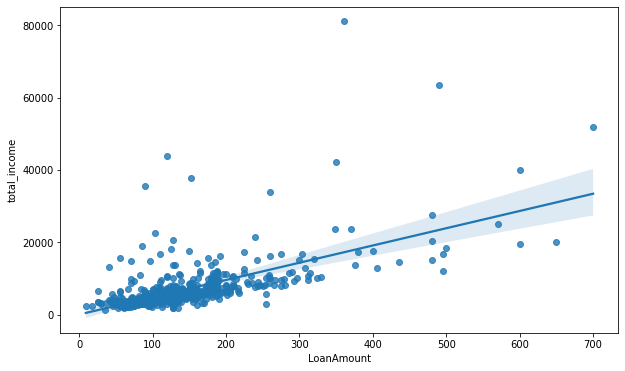

In [32]:
#Let's check the relationship of loan amount with the total income
plt.figure(figsize=(10,6))
sns.regplot(x='LoanAmount', y='total_income', data=data)
plt.show()

In [ ]:
Observations:
The plot shows that the loan amount is positively correlated with total income. This implies that the loan amount for higher-income applicants is progressively higher.
There are some outliers visible, showing applicants with low income having been given loans of a higher amount.

<AxesSubplot:xlabel='Loan_Status', ylabel='total_income'>

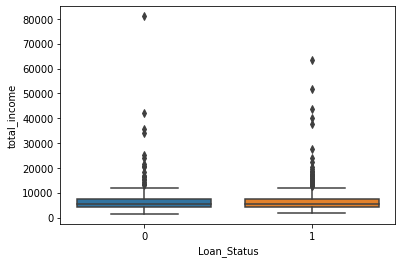

In [33]:
#Let's check the relatioship of total income with loan status
sns.boxplot(x=data.Loan_Status, y=data.total_income)

In [ ]:
Observations:
Except for some outliers, there is no major difference between the income of those customers who are eligible versus those who are not.
This implies that income alone might not be a good indicator of a customer's loan eligibility.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

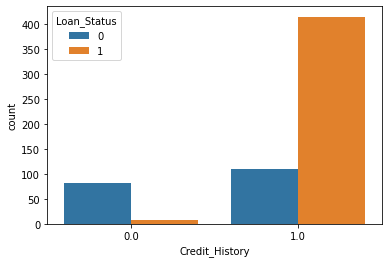

In [34]:
#Let's check how credit history is related to loan status
sns.countplot(x=data.Credit_History, hue=data.Loan_Status)

In [ ]:
Observations:
The plot shows that credit history is an important factor while checking loan eligibility. There are very few customers whose loan was approved even when their credit history did not meet required guidelines.

<AxesSubplot:xlabel='Education', ylabel='count'>

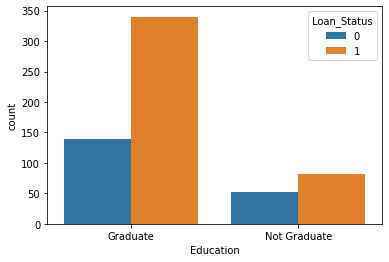

In [35]:
#Let's check the relationship between education and loan status
sns.countplot(x=data.Education, hue=data.Loan_Status)

In [ ]:
Observations:
We can see that graduate customers are more likely to get loans.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

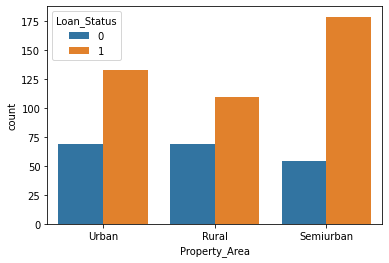

In [36]:
#Let's check if property area is related with loan status
sns.countplot(x=data.Property_Area, hue=data.Loan_Status)

In [ ]:
Observations:
The plot shows that more loans are approved for properties in semi-urban areas.
This could be due to several reasons. The bank might be charging higher interest rates for semi-urban areas or the current customer base of the company from semi-urban areas might actually be more eligible for home loans based on loan applicant features. We cannot be certain as we don't have the data to support this claim.

In [ ]:
#Preparing data for modeling¶
Models cannot take non-numeric inputs. So, we will first create dummy variables for all the categorical variables.
We will then split the data into train and test sets.

In [37]:
#Separating target variable and other variables

X= data.drop(columns = ['Loan_Status'])
Y= data.Loan_Status

In [38]:
#Creating dummy variables 
#drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first=True)

In [39]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [ ]:
Building Classification Models:

In [40]:
#function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
Logistic Regression:

In [41]:
#define logistic regression model 
log_reg= LogisticRegression(random_state = 1)

In [42]:
#fit the model
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [43]:
#Let's check the coefficient of each dependent variable in the data
pd.Series(log_reg.coef_[0], index=X_train.columns).sort_values(ascending=False)

Credit_History             3.026255
Property_Area_Semiurban    0.821588
Married_Yes                0.189407
Dependents_2               0.154738
Dependents_3+              0.113787
total_income              -0.000010
LoanAmount                -0.000474
Property_Area_Urban       -0.006438
Loan_Amount_Term          -0.065874
Self_Employed_Yes         -0.098511
Gender_Male               -0.106007
Dependents_1              -0.145731
Education_Not Graduate    -0.491750
dtype: float64

In [44]:
#Let's now find the odds calculated from the logistic regression model coefficients
odds = np.exp(log_reg.coef_[0]) #finding the odds

#adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False) 

,odds
Credit_History,20.619861
Property_Area_Semiurban,2.274108
Married_Yes,1.208532
Dependents_2,1.167352
Dependents_3+,1.120513
total_income,0.999990
LoanAmount,0.999526
Property_Area_Urban,0.993583
Loan_Amount_Term,0.936249
Self_Employed_Yes,0.906186


In [ ]:
Observations:
The odds of an applicant's loan application being approved is around 20 times higher for a person who meets the loan approval requirements compared to someone who doesn't
The odds of an applicant's loan application being approved is over double if he is married compared to someone who is not.

In [48]:
#Now, let's check the performance of the model on the training set

In [45]:
#predict on the training data 
y_pred_train = log_reg.predict(X_train)

              precision    recall  f1-score   support

           0       0.91      0.44      0.59       131
           1       0.80      0.98      0.88       298

    accuracy                           0.82       429
   macro avg       0.85      0.71      0.74       429
weighted avg       0.83      0.82      0.79       429



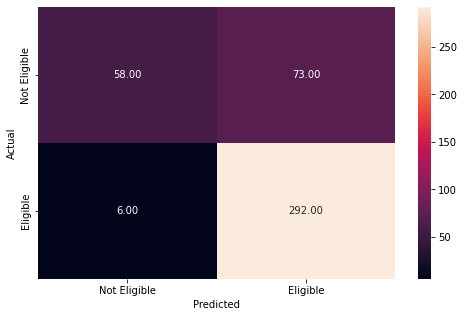

In [46]:
# Checking performance on the training data
metrics_score(y_train, y_pred_train)

In [ ]:
Confusion Matrix:
True Positive: Predicting the customer is not eligible and the customer is actually not eligible
False Negative: Predicting the customer is eligible but the customer is actually not eligible
True Negative: Predicting the customer is eligible and the customer is actually eligible
False Positive: Predicting the customer is not eligible but the customer is actually eligible

In [ ]:
Observation:
We see around 82% accuracy on our training set.
The recall score is only 44% for class 0 which is low, considering we want to get a strong recall value for our specific problem. Thus, this model will not perform well for us.

In [47]:
#Precision-Recall curve for Logistic Regression
y_scores=log_reg.predict_proba(X_train)

In [48]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:,1])

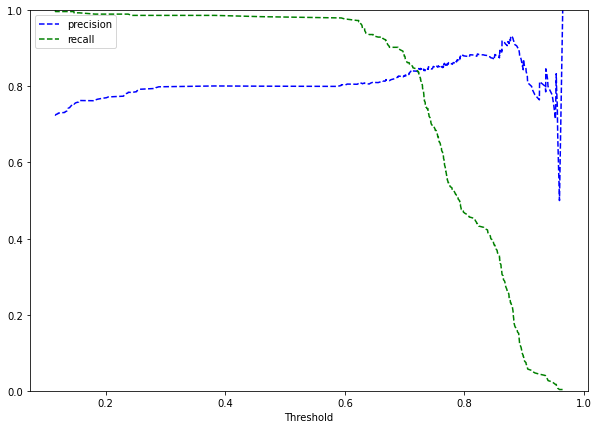

In [49]:
#Plotting values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [ ]:
Observations:
We can see that precision and recall are balanced for threshold of about 0.7.

In [50]:
#Let's try to calculate the exact threshold where precision and recall are equal.
#calculating the exact threshold where precision and recall are equal.

for i in np.arange(len(thresholds)):
    if precisions[i]==recalls[i]:
        print(thresholds[i])

0.7222044728784354


In [ ]:
The threshold of 0.72 would give a balanced precision and recall.

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       131
           1       0.85      0.69      0.76       298

    accuracy                           0.70       429
   macro avg       0.68      0.71      0.68       429
weighted avg       0.75      0.70      0.71       429



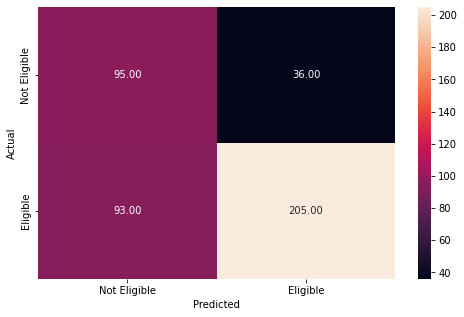

In [51]:
#So let's compare the performance of the model on the training and testing sets after changing the threshold

optimal_threshold1 = 0.75
metrics_score(y_train, y_scores[:,1]>optimal_threshold1)

#Checking performance on the testing data
y_pred_test = log_reg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

In [ ]:
Observations:
We can see that even though the precision dropped for class 0, the recall score is much higher after using the optimal threshold, and now our model is a lot more appropriate after improvement.
Similar performance on both the training data and the test data

In [ ]:
K - Nearest Neighbors (KNN):

In [53]:
knn = KNeighborsClassifier()
ss = StandardScaler()

In [54]:
train_error = []
test_error = []
knn_many_split = {}

In [55]:
error_df_knn = pd.DataFrame()
features = X.columns

In [ ]:
for k in range(1,21):
    train_error = []
    test_error = []
    lista = []
    knn = KNeighborsClassifier(n_neighbors=k)
    for i in range(30):
        x_train_new, x_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size = 0.20)
         #let us scale the data
        x_train_new = ss.fit_transform(x_train_new)  #fit_transform the training data
        x_val = ss.transform(x_val) #transform the validation set
        #Fitting knn on training data
        knn.fit(x_train_new, y_train_new)
        #Calculating error on training and validation data
        train_error.append(1 - knn.score(x_train_new, y_train_new)) 
        test_error.append(1 - knn.score(x_val, y_val))
    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))
    knn_many_split[k] = lista
    knn_many_split

In [ ]:
# Extracting the train and the test error for each k in a list for easy plotting

In [ ]:
kltest = []
vltest = []
for k, v in knn_many_split.items():
    kltest.append(k)
    vltest.append(knn_many_split[k][1])
    
kltrain = []
vltrain = []

for k, v in knn_many_split.items():
    kltrain.append(k)
    vltrain.append(knn_many_split[k][0])

In [ ]:
# Plotting k vs error 
plt.figure(figsize=(10,6))
plt.plot(kltest,vltest, label = 'test' )
plt.plot(kltrain,vltrain, label = 'train')
plt.legend()
plt.show()

In [ ]:
Observations:
We can see that the train error and the test error are more or less similar for K more than or equal to 7.
This implies that we would get generalized results if we choose K=7.
So, let's scale the full data and fit the model on the entire training set.

In [74]:
# scaling the data
scaler=StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)  #fit_transform the training data
X_test_scaled=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns) #transform the testing data

In [75]:
#Fitting the model on the scaled data
knn = KNeighborsClassifier(n_neighbors = 7, weights='distance')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [ ]:
Now, let's check the performance of the model on the training and testing data.

In [76]:
#predicting on train data
y_pred_train_knn = knn.predict(X_train_scaled)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       298

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429



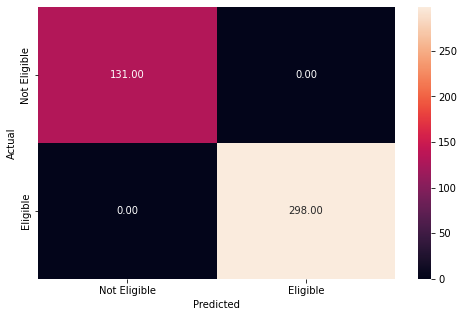

In [77]:
#checking performance of the model
metrics_score(y_train, y_pred_train_knn)

In [ ]:
Observations:
The performance on the training set is very strong, as it predicts perfectly who is eligible and who isn't. The precission, recall, and and accuracy are all optimal at 100%.

In [78]:
#predict on test data
y_pred_test_knn = knn.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.61      0.31      0.41        61
           1       0.73      0.90      0.81       124

    accuracy                           0.71       185
   macro avg       0.67      0.61      0.61       185
weighted avg       0.69      0.71      0.68       185



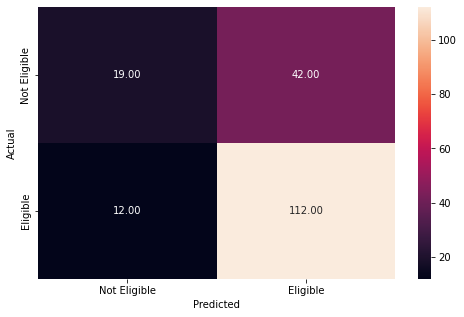

In [79]:
#checking performance of the model
metrics_score(y_test, y_pred_test_knn)

In [ ]:
Observation:
We see a weak performance on the scaled testing data, as the recall score is only 0.31 for the 0. There were 42 people that our Knn model predicted to be eligible who are actually not eligible, which is concerning given that we want to minimize this value as much as possible.

In [ ]:
Conclusion
Using multiple models, EDA, and visualization, we were able to identify the key factors that are involved with whether or not a loan application will be accepted, with the biggest one being credit history.
Our Logistic regression model gave thet highest recall score which is the measure that we wanted to maximize, since we don't want to grant loans to applicants who are unable to repay them, since it would hurt the company.